In [1]:
# Set project root
import os
os.chdir('./..')

# Setting locale for pretty printing
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [2]:
# Importing something that can be useful, I hope
from Utils.Data.Data import get_feature, get_dataset, get_dictionary
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 110
import pandas as pd
import numpy as np

# Train dataset analysis

In [3]:
columns = [
    "mapped_feature_tweet_id",
    "tweet_feature_number_of_video",
    "tweet_feature_number_of_gif",
    "tweet_feature_number_of_photo",
    "tweet_feature_number_of_media",
    "mapped_feature_tweet_media"
]
dataset_id = "train"

In [4]:
# Load the data
dataframe = get_dataset(columns, dataset_id)
dataframe

,mapped_feature_tweet_id,tweet_feature_number_of_video,tweet_feature_number_of_gif,tweet_feature_number_of_photo,tweet_feature_number_of_media,mapped_feature_tweet_media
0,0,0,0,0,0,None
1,1,0,0,1,1,[0]
2,2,0,0,0,0,None
3,3,0,0,0,0,None
4,4,0,0,0,0,None
...,...,...,...,...,...,...
148075233,73549796,0,0,0,0,None
148075234,73549797,0,0,0,0,None
148075235,2581571,0,0,0,0,None
148075236,15200993,0,0,0,0,None


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148075238 entries, 0 to 148075237
Data columns (total 6 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   mapped_feature_tweet_id        int64 
 1   tweet_feature_number_of_video  int64 
 2   tweet_feature_number_of_gif    int64 
 3   tweet_feature_number_of_photo  int64 
 4   tweet_feature_number_of_media  int64 
 5   mapped_feature_tweet_media     object
dtypes: int64(5), object(1)
memory usage: 6.6+ GB


## Yeah! Array sucks... 8GB

In [6]:
dataframe[:50]

,mapped_feature_tweet_id,tweet_feature_number_of_video,tweet_feature_number_of_gif,tweet_feature_number_of_photo,tweet_feature_number_of_media,mapped_feature_tweet_media
0,0,0,0,0,0,None
1,1,0,0,1,1,[0]
2,2,0,0,0,0,None
3,3,0,0,0,0,None
4,4,0,0,0,0,None
5,5,0,0,0,0,None
6,6,0,0,0,0,None
7,7,0,0,0,0,None
8,8,0,0,0,0,None
9,9,0,0,0,0,None


In [7]:
unique_tweet_dataframe = dataframe.drop_duplicates("mapped_feature_tweet_id")

In [8]:
total_amount_of_photo = unique_tweet_dataframe['tweet_feature_number_of_photo'].sum()
total_amount_of_video = unique_tweet_dataframe['tweet_feature_number_of_video'].sum()
total_amount_of_gif = unique_tweet_dataframe['tweet_feature_number_of_gif'].sum()
total_amount_of_media = unique_tweet_dataframe['tweet_feature_number_of_media'].sum()

The amount of photos are 25628943, that are 0.7822 of all media
The amount of photos are 6401016, that are 0.1954 of all media
The amount of photos are 735361, that are 0.0224 of all media


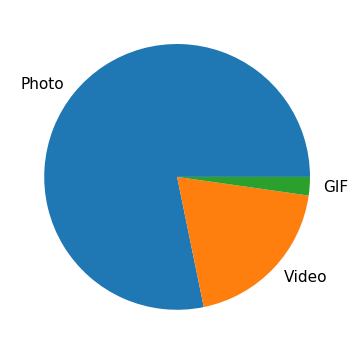

In [9]:
print(f"The amount of photos are {total_amount_of_photo}, that are {total_amount_of_photo/total_amount_of_media:.4f} of all media")
print(f"The amount of photos are {total_amount_of_video}, that are {total_amount_of_video/total_amount_of_media:.4f} of all media")
print(f"The amount of photos are {total_amount_of_gif}, that are {total_amount_of_gif/total_amount_of_media:.4f} of all media")
plt.pie([total_amount_of_photo, total_amount_of_video, total_amount_of_gif], labels=["Photo", "Video", "GIF"])
plt.show()

In [10]:
unique_tweet_dataframe[['tweet_feature_number_of_video']].groupby('tweet_feature_number_of_video').size()
unique_tweet_dataframe[['tweet_feature_number_of_gif']].groupby('tweet_feature_number_of_gif').size()
unique_tweet_dataframe[['tweet_feature_number_of_media']].groupby('tweet_feature_number_of_media').size()

tweet_feature_number_of_media
0    49976597
1    18299622
2     2896610
3      835402
4     1541568
dtype: int64

                                      0
tweet_feature_number_of_photo          
0                              57111970
1                              11165126
2                               2895816
3                                835363
4                               1541524


Text(0, 0.5, 'Number of tweet with X photo')

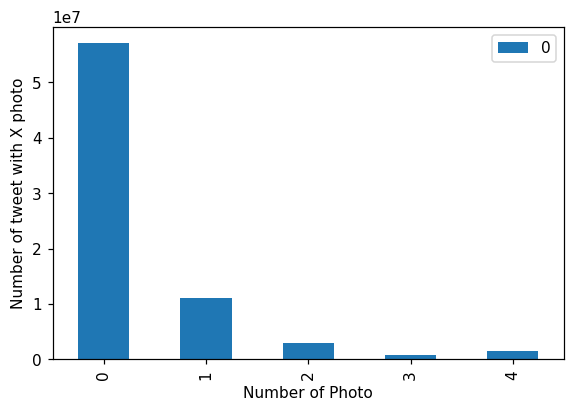

In [11]:
aggregate_result = pd.DataFrame(unique_tweet_dataframe[['tweet_feature_number_of_photo']].groupby("tweet_feature_number_of_photo").size())
print(aggregate_result)
plot = aggregate_result.plot(kind="bar")
plot.set_xlabel('Number of Photo')
plot.set_ylabel('Number of tweet with X photo')

                                      0
tweet_feature_number_of_video          
0                              67149298
1                               6400048
2                                   409
3                                    26
4                                    18


Text(0, 0.5, 'Number of tweet with X video')

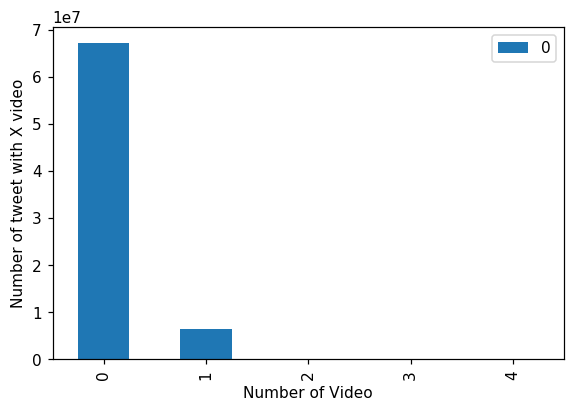

In [12]:
aggregate_result = pd.DataFrame(unique_tweet_dataframe[['tweet_feature_number_of_video']].groupby('tweet_feature_number_of_video').size())
print(aggregate_result)
plot = aggregate_result.plot(kind="bar")
plot.set_xlabel('Number of Video')
plot.set_ylabel('Number of tweet with X video')

                                    0
tweet_feature_number_of_gif          
0                            72814449
1                              735339
2                                  11


Text(0, 0.5, 'Number of tweet with X gif')

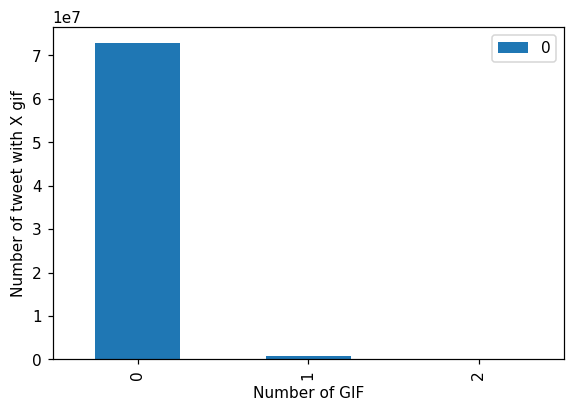

In [13]:
aggregate_result = pd.DataFrame(unique_tweet_dataframe[['tweet_feature_number_of_gif']].groupby("tweet_feature_number_of_gif").size())
print(aggregate_result)
plot = aggregate_result.plot(kind="bar")
plot.set_xlabel('Number of GIF')
plot.set_ylabel('Number of tweet with X gif')

                                      0
tweet_feature_number_of_media          
0                              49976597
1                              18299622
2                               2896610
3                                835402
4                               1541568


Text(0, 0.5, 'Number of tweet with X media')

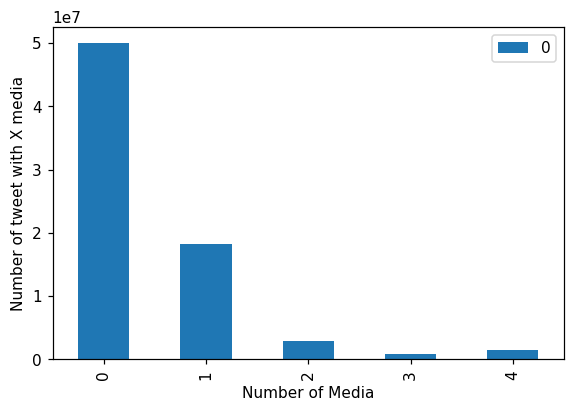

In [14]:
aggregate_result = pd.DataFrame(unique_tweet_dataframe[['tweet_feature_number_of_media']].groupby("tweet_feature_number_of_media").size())
print(aggregate_result)
plot = aggregate_result.plot(kind="bar")
plot.set_xlabel('Number of Media')
plot.set_ylabel('Number of tweet with X media')

## Let's see if there's a correlation between number of media and the type of engagement involved in the engagement

In [15]:
del unique_tweet_dataframe

In [16]:
# Load the engagement type
cols = [
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment",
    "tweet_feature_engagement_is_negative"
]

# Load the data
dataframe = pd.concat([
    dataframe[['tweet_feature_number_of_media']],
    get_dataset(cols, dataset_id)
], axis=1)

dataframe['tweet_feature_engagement_is_positive'] = dataframe[[
    "tweet_feature_engagement_is_like",
    "tweet_feature_engagement_is_retweet",
    "tweet_feature_engagement_is_reply",
    "tweet_feature_engagement_is_comment"
]].sum(axis=1)

dataframe

,tweet_feature_number_of_media,tweet_feature_engagement_is_like,tweet_feature_engagement_is_retweet,tweet_feature_engagement_is_reply,tweet_feature_engagement_is_comment,tweet_feature_engagement_is_negative,tweet_feature_engagement_is_positive
0,0,False,False,False,False,True,0
1,1,False,False,False,False,True,0
2,0,True,False,False,False,False,1
3,0,False,False,False,False,True,0
4,0,False,False,False,False,True,0
...,...,...,...,...,...,...,...
148075233,0,False,False,False,False,True,0
148075234,0,False,False,False,False,True,0
148075235,0,True,True,False,False,False,2
148075236,0,True,False,False,False,False,1


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148075238 entries, 0 to 148075237
Data columns (total 7 columns):
 #   Column                                Dtype
---  ------                                -----
 0   tweet_feature_number_of_media         int64
 1   tweet_feature_engagement_is_like      bool 
 2   tweet_feature_engagement_is_retweet   bool 
 3   tweet_feature_engagement_is_reply     bool 
 4   tweet_feature_engagement_is_comment   bool 
 5   tweet_feature_engagement_is_negative  bool 
 6   tweet_feature_engagement_is_positive  int64
dtypes: bool(5), int64(2)
memory usage: 2.9 GB


In [22]:
result = pd.DataFrame(dataframe.groupby("tweet_feature_number_of_media").sum())

In [23]:
result['n_engagements'] = pd.DataFrame(dataframe.groupby("tweet_feature_number_of_media").size())

In [24]:
result['like_ratio'] = result['tweet_feature_engagement_is_like'] / result['n_engagements']
result['retweet_ratio'] = result['tweet_feature_engagement_is_retweet'] / result['n_engagements'] 
result['reply_ratio'] = result['tweet_feature_engagement_is_reply'] / result['n_engagements'] 
result['comment_ratio'] = result['tweet_feature_engagement_is_comment'] / result['n_engagements'] 
result['negative_ratio'] = result['tweet_feature_engagement_is_negative'] / result['n_engagements']

#### Plot for all type of engagement

Text(0, 0.5, 'Probability it is involved in that type of engagement')

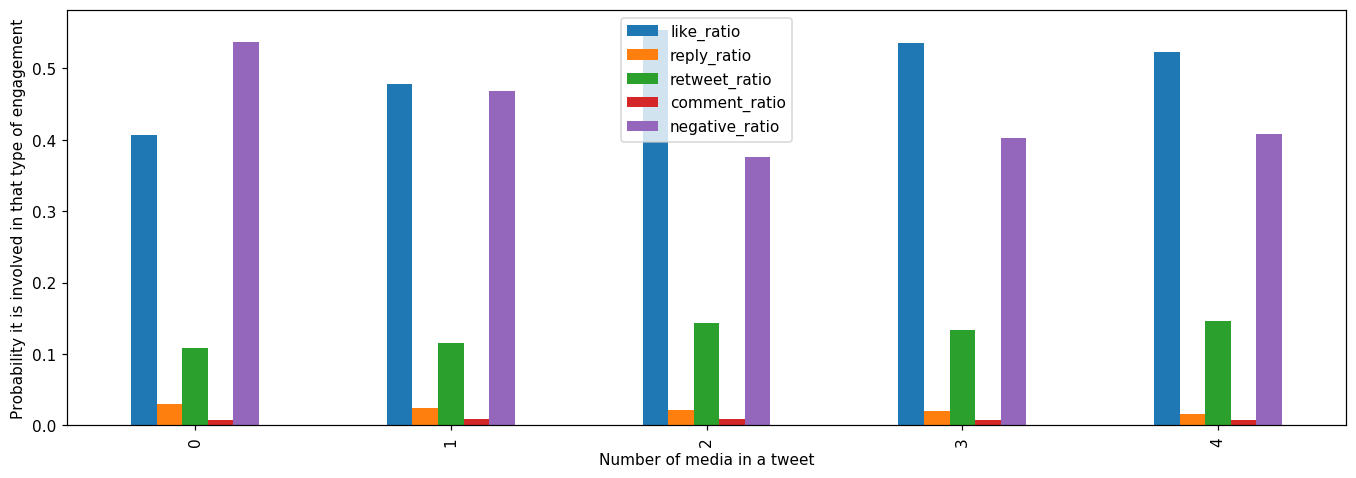

In [25]:
plt.rcParams['figure.figsize'] = [15, 5]
plot = result[[
    'like_ratio',
    'reply_ratio',
    'retweet_ratio',
    'comment_ratio',
    'negative_ratio'
]].plot(kind="bar")
plot.set_xlabel("Number of media in a tweet")
plot.set_ylabel("Probability it is involved in that type of engagement")

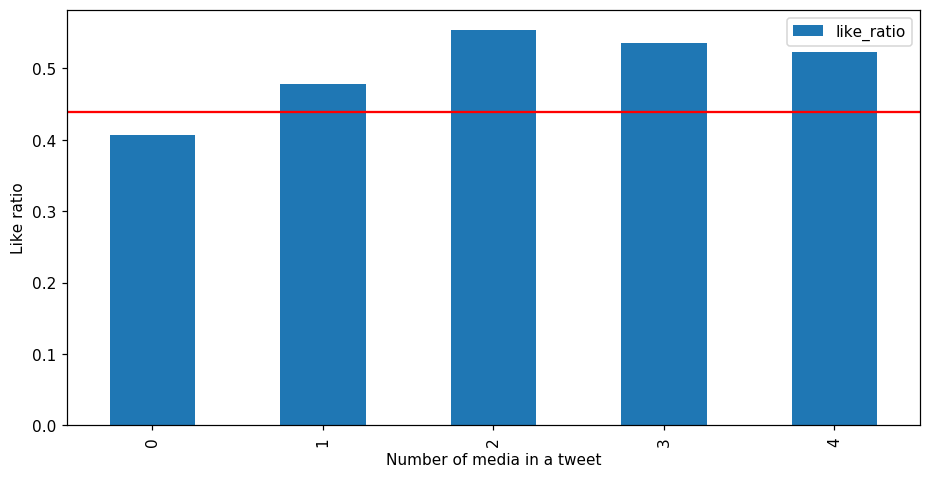

In [34]:
plt.rcParams['figure.figsize'] = [10, 5]
plot = result[[
    'like_ratio'
]].plot(kind="bar")
plot.set_xlabel("Number of media in a tweet")
plot.set_ylabel("Like ratio")
plot.axhline(0.4392, color="red") # Computed before, see notebook that analyze the engagements

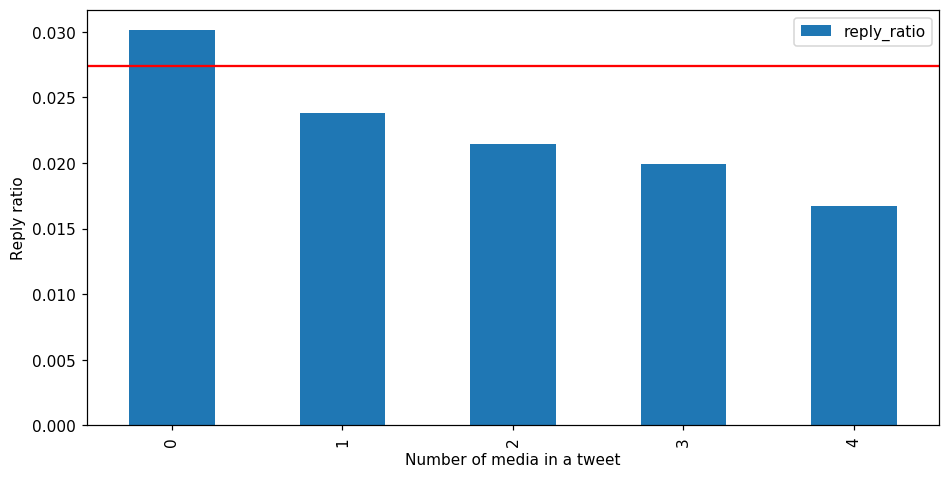

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
plot = result[[
    'reply_ratio'
]].plot(kind="bar")
plot.set_xlabel("Number of media in a tweet")
plot.set_ylabel("Reply ratio")
plot.axhline(0.0274, color="red") # Computed before, see notebook that analyze the engagements

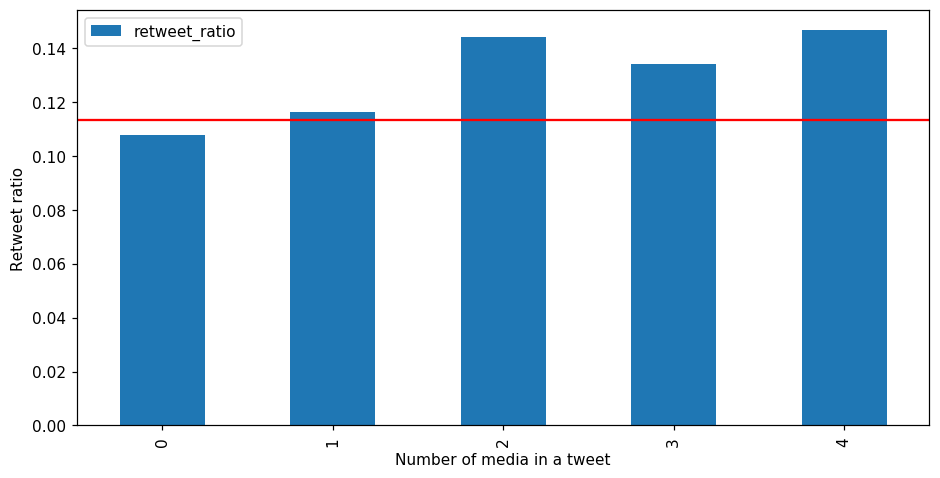

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
plot = result[[
    'retweet_ratio'
]].plot(kind="bar")
plot.set_xlabel("Number of media in a tweet")
plot.set_ylabel("Retweet ratio")
plot.axhline(0.1131, color="red") # Computed before, see notebook that analyze the engagements

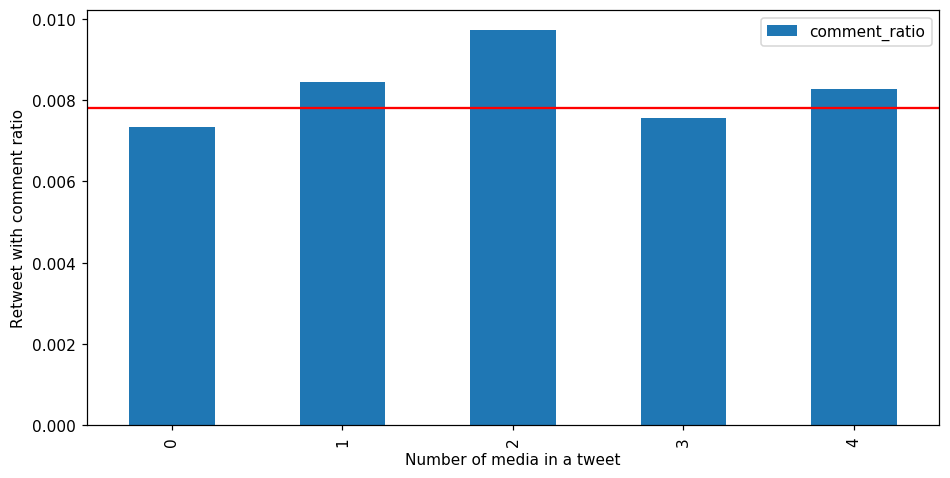

In [37]:
plt.rcParams['figure.figsize'] = [10, 5]
plot = result[[
    'comment_ratio'
]].plot(kind="bar")
plot.set_xlabel("Number of media in a tweet")
plot.set_ylabel("Retweet with comment ratio")
plot.axhline(0.0078, color="red") # Computed before, see notebook that analyze the engagements